### Phase Comparison of an FIR LPF vs. IIR LPF

- Desired attenuation level of IIR is matched to the FIR's level ($-60 dB$)
- IIR filter is automatically designed so that the pass-band is approximately linear-phase
- Since this is a low-pass filter, the low frequency region of the IIR phase response is linear
- Hence, the time domain outputs of FIR and IIR filters look similar
- Automatic linear-phase IIR filter design holds also for HPF, band-pass, and band-stop filters

Next example: [/examples/lti_filters/speed.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/speed.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../') # To be able to reach functions
from functions import fft, lti
from scipy import signal

In [2]:
num_of_coeffs = 80 # Number of coefficients, i.e. the filter order + 1
cutoff_freqs = [.5]
numerator_coeffs_fir = signal.firwin(num_of_coeffs, cutoff_freqs) # FIR (LPF by default)
lti.equation(numerator_coeffs_fir)

<IPython.core.display.Latex object>

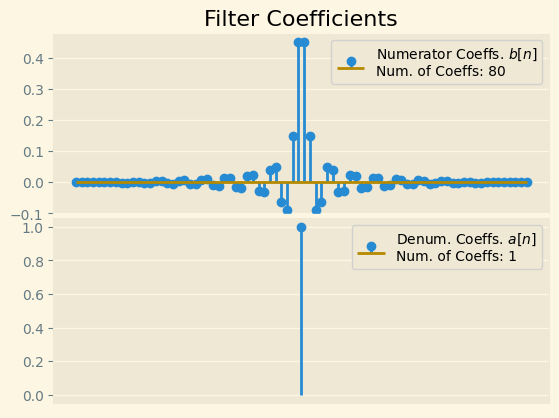

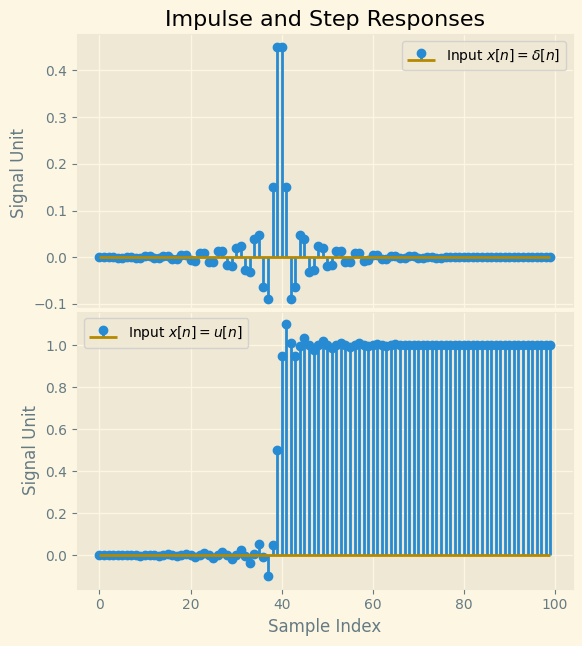

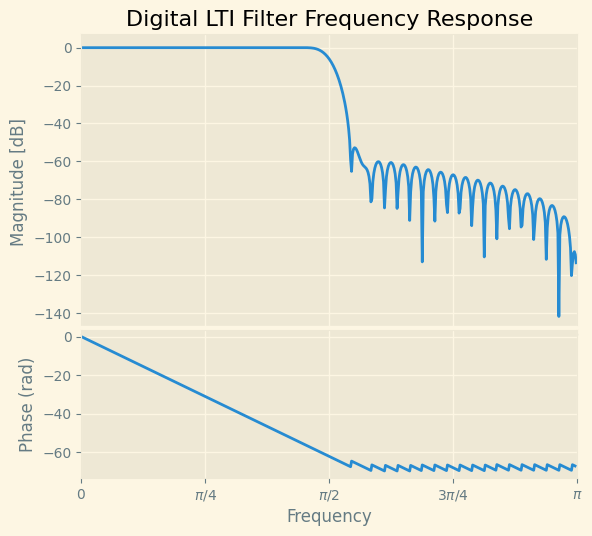

In [3]:
lti.plot_filter_coefficients(numerator_coeffs_fir)
lti.plot_impulse_and_step_responses(numerator_coeffs_fir)
lti.bode(numerator_coeffs_fir)

In [3]:
pass_freqs = [.45]
stop_freqs = [.55]
pass_loss_dB = 1
stop_loss_dB = 60
numerator_coeffs_iir, denum_coeffs_iir = signal.iirdesign(pass_freqs, stop_freqs, pass_loss_dB, stop_loss_dB)
lti.equation(numerator_coeffs_iir, denum_coeffs_iir)

<IPython.core.display.Latex object>

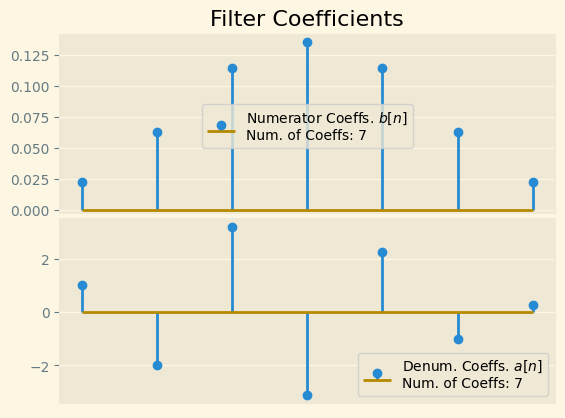

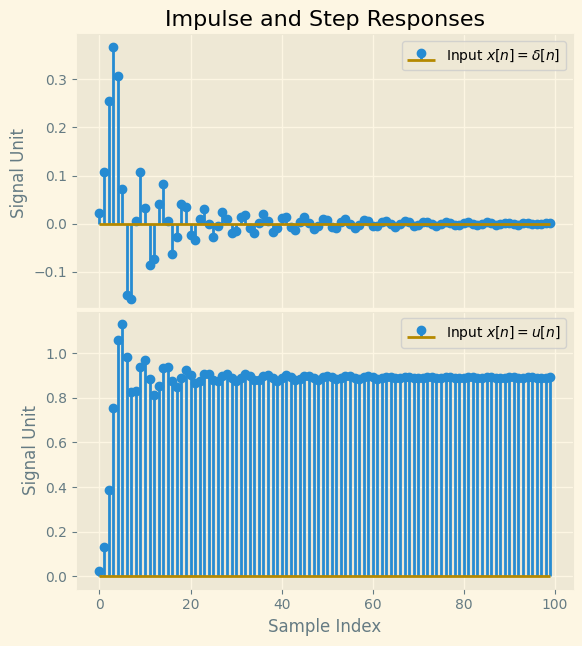

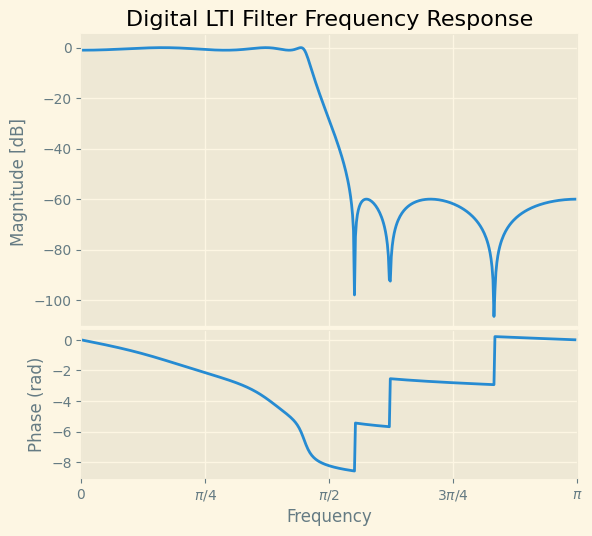

In [5]:
lti.plot_filter_coefficients(numerator_coeffs_iir, denum_coeffs_iir)
lti.plot_impulse_and_step_responses(numerator_coeffs_iir, denum_coeffs_iir)
lti.bode(numerator_coeffs_iir, denum_coeffs_iir)

In [6]:
first_time = 0 # s
last_time = 9 # s
samp_freq = 100 # Hz

time = fft.get_time(first_time, last_time, samp_freq) # s

low_freq_1 = 1 # Hz
low_freq_2 = 3 # Hz
low_freq_3 = 7 # Hz
high_freq = 38 # Hz

common_amplitude = 1
common_offset = 0

signal_low_freq_1 = fft.get_signal(low_freq_1, common_amplitude, low_freq_1, common_offset, time)
signal_low_freq_2 = fft.get_signal(low_freq_2, common_amplitude, low_freq_2, common_offset, time)
signal_low_freq_3 = fft.get_signal(low_freq_3, common_amplitude, low_freq_3, common_offset, time)
signal_high_freq = fft.get_signal(high_freq, common_amplitude, high_freq, common_offset, time)

superposition_signal =  signal_low_freq_1 + signal_low_freq_2 + signal_low_freq_3 + signal_high_freq

In [7]:
filtered_signal_fir = signal.lfilter(numerator_coeffs_fir, [1], superposition_signal)
filtered_signal_iir = signal.lfilter(numerator_coeffs_iir, denum_coeffs_iir, superposition_signal)

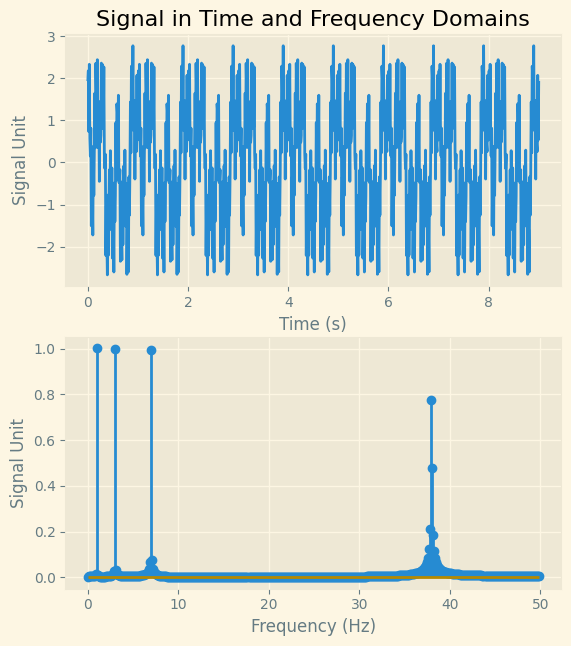

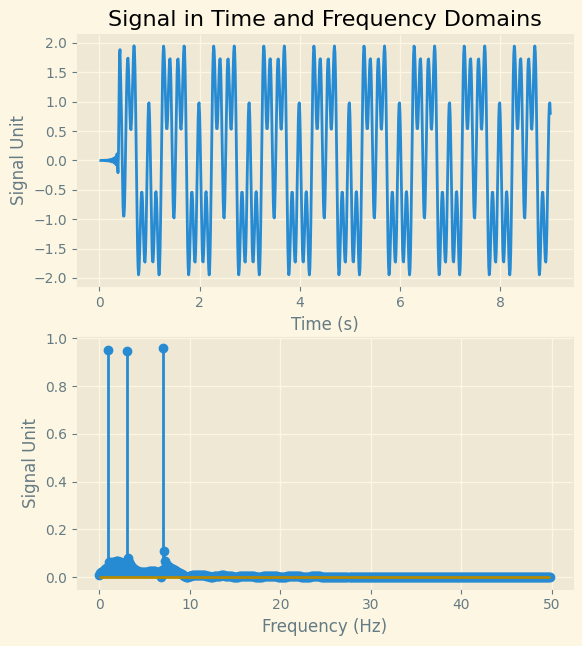

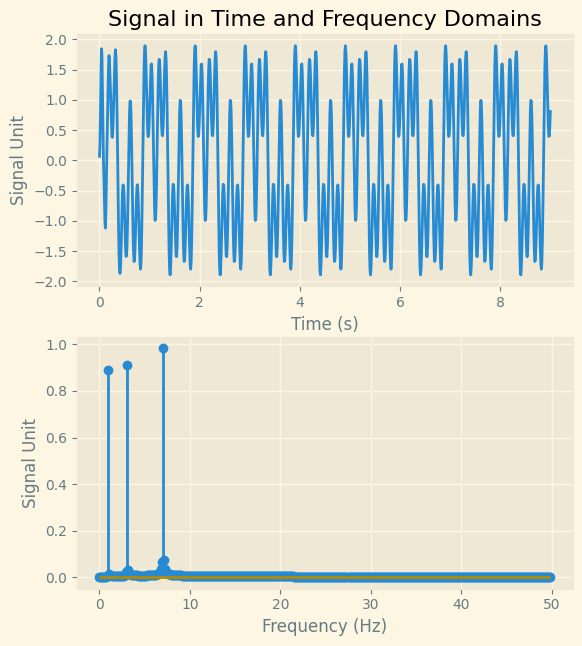

In [8]:
fft.plot_signal_and_fft(time, superposition_signal, samp_freq)
fft.plot_signal_and_fft(time, filtered_signal_fir, samp_freq)
fft.plot_signal_and_fft(time, filtered_signal_iir, samp_freq)

Next example: [/examples/lti_filters/speed.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/speed.ipynb)